# Example notebook for analysing and plotting the paper figures
### [OpenScope Credit Assignment repository](https://github.com/colleenjg/OpenScope_CA_Analysis)
### [Gillon _et al._, 2021, _bioRxiv_](https://www.biorxiv.org/content/10.1101/2021.01.15.426915v2)


---
## 1. Setup
To run this notebook, the conda environment with all the requisite packages, specified in `osca.yml`, should first be installed, and the **environment should be activated**.  
If running this notebook in **Binder**, for example, this is done automatically. The only remaining setup step is to adjust notebook settings, and download the data from the Dandi archive.

### a. Adjust a few settings in the notebook
#### First, **we set a few variables**
These should be adjusted, based on where the code is running, and the resources available.

In [1]:
from pathlib import Path

# Data directory
datadir = Path("..", "data")

# Where to save analysis outputs
output = "."

# Whether to distribute analyses across CPUs
parallel = True

# Maximum memory to use (per CPU, in array size) when performing permutation analyses
lim_e6_size = 100

If the notebook is running **in a Docker**, we use default settings for the data directory and output directory.  
If the notebook is running **in Binder, specifically**, we also use default settings for the variables relating to memory use.

In [2]:
from pathlib import Path
import os

# check where the notebook is running
running_in_docker = False
running_in_binder = False
if "jovyan" in str(Path().resolve()):
    # 'jovyan' is the name of the home directory on dockers
    running_in_docker = True
    if "binder" in os.getenv("JUPYTER_IMAGE"):
        running_in_binder = True

# update some settings accordingly
if running_in_docker:
    print(
        f"It appears that this notebook is running in a docker. "
        "The data and output directories have been updated accordingly."
    )
    datadir = "data"
    output = "."

if running_in_binder:
    print(
        f"It appears that this notebook is running in Binder, specifically. "
        "Variables relating to memory use have also been updated accordingly."
    )
    # For Binder, we minimize memory use, as memory resources are limited (1-2 GB of RAM).
    lim_e6_size = 10
    parallel = False # do not run in parallel

It appears that this notebook is running in a docker. The data and output directories have been updated accordingly.
It appears that this notebook is running in Binder, specifically. Variables relating to memory use have also been updated accordingly.


#### We then update a few notebook settings.

In [3]:
# Set an environment variable that controls maximum memory use when performing permutation analyses.
%env LIM_E6_SIZE = $lim_e6_size
    
# Set the argument that determines whether analyses are run sequentially or in parallel.
if parallel:
    parallel_arg = "--parallel"
else:
    parallel_arg = ""
    
# Filter warnings related to multiprocessing performance.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="A worker stopped")
warnings.filterwarnings("ignore", category=UserWarning, message="Unless memory demands")
warnings.filterwarnings("ignore", category=UserWarning, message="This figure includes")
warnings.filterwarnings("ignore", category=UserWarning, message="Requested font")

# Update logging and warnings format.
from util import logger_util
logger_util.format_all(level='info')

env: LIM_E6_SIZE=10


### b. Download data from the [Dandi archive](https://gui.dandiarchive.org/#/dandiset/000037).
Now, we download, into the data directory, the data needed to run this notebook. In this case, we will only be needing **session 1 data** (11 files) for all subjects.

To **download the data**, we use the `sess_util/sess_download_util.py` script. This may take a few minutes. 

**Note:** Any files that _already_ exist in the data directory (and pass the checksum) will be skipped, and **not** redownloaded.

In [4]:
print("Downloading data from Dandi (may take a few minutes)...\n")
%run sess_util/sess_download_util.py --sess_ns 1 --output $datadir


Identifying the URLs of dandi assets to download...
PATH                                        SIZE      DONE             DONE% CHECKSUM STATUS          MESSAGE
sub-408021_ses-758519303_behavior+ophys.nwb 238.0 MB  238.0 MB          100%    ok    done                   
sub-411771_ses-760260459_behavior+ophys.nwb 230.3 MB  230.3 MB          100%    ok    done                   
sub-411424_ses-761624763_behavior+ophys.nwb 226.5 MB  226.5 MB          100%    ok    done                   
sub-413663_ses-764704289_behavior+ophys.nwb 722.7 MB  722.7 MB          100%    ok    done                   
sub-418779_ses-777496949_behavior+ophys.nwb 134.6 MB  134.6 MB          100%    ok    done                   
sub-420011_ses-777914830_behavior+ophys.nwb 313.9 MB  313.9 MB          100%    ok    done                   
sub-433451_ses-823453391_behavior+ophys.nwb 1.1 GB    1.1 GB            100%    ok    done                   
sub-433414_ses-826187862_behavior+ophys.nwb 820.3 MB  820.3 MB     

---
## 2. Run paper analyses

All subsequent code should be **run from inside the OpenScope_CA_Analysis repository**.

We can now run some paper analyses and plot them.

We use the `run_paper_figures.py` script in the main directory of the OpenScope_CA_Analysis directory, with the following arguments:
- `datadir`: path to the downloaded data
- `output`: main directory in which to store the analysis data and plots
- `overwrite`: if included, existing analysis data and plots are overwritten
- `paper`: paper for which to plot figures (`dataset` or `analysis`)
- `figure`: figure to plot (either `all` or a specific figure)
- `panel`: panel to plot (either `all` or a specific panel)
- `parallel`: if included, analyses are parallelized across available CPUs

#### **Notes on using Binder:** 
If running this notebook in Binder, the compute resources available are limited.
- The analyses for most figure panels (other than the ones included in this notebook) are likely to **exceed the memory resources (RAM) available** (1 to 2 GB, maximum).
- To reduce memory usage, we run the analyses that _are_ included in the notebook sequentially, without the `--parallel` argument. 
- If an analysis suddenly crashes, and the **kernel is restarted**, it is likely due to the instance running out of memory.  
- The analyses included in this notebook should **require ~1.6 GB of memory total, at most**. Most of the time, Binder can accomodate this. However, occasionally, the amount of RAM available is closer to 1 GB, and the kernel will crash. **Trying again usually works.**


In [5]:
# Uncomment the code below to see descriptions for all arguments
# %run run_paper_figures.py --help

## 2A. Dataset paper
### Fig. 1B



________________________________________________________________________________
Fig. 1B (dataset paper). Running analysis and producing plot: Example projections of 2p imaging planes.

- Minor manual formatting adjustments may be missing.

File will be overwritten.

Loading 4 session(s)...


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Compiling imaging plane projection examples.


    Rasterizing imaging plane images...

Figures saved under paper_figures/dataset_paper/Fig1.
Duration: 8.87s


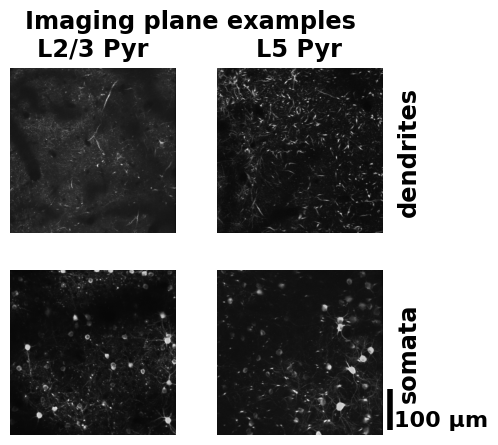

In [6]:
%run run_paper_figures.py --overwrite --paper dataset --figure 1 --panel B $parallel_arg --datadir $datadir --output $output

### Fig. 6A



________________________________________________________________________________
Fig. 6A (dataset paper). Running analysis and producing plot: Full session running and pupil responses.

- Minor manual formatting adjustments may be missing.
- Running and pupil images will be missing.

File will be overwritten.

Loading 1 session(s)...


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Compiling pupil and running traces for a full session.



Figures saved under paper_figures/dataset_paper/Fig6.
Duration: 6.70s


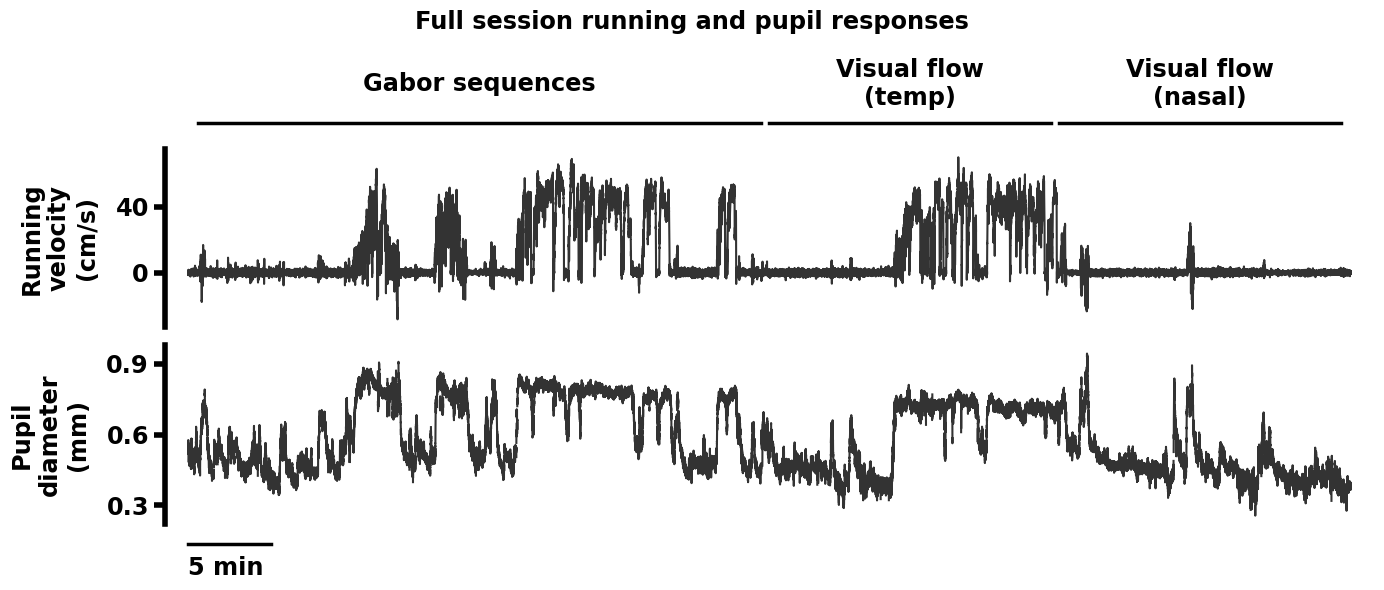

In [7]:
%run run_paper_figures.py --overwrite --paper dataset --figure 6 --panel A $parallel_arg --datadir $datadir --output $output

## 2B. Analysis paper
### Fig. 3B, but with lower statistical power
Here, we run the analysis without the `--full_power` argument, in order to reduce compute time and memory demands. 

This means that, for this panel, fewer random permutations (here, `1e3` instead of `1e4`) are used in order to calculate each ROI's USI null distribution, and resulting significance percentile. The exact distribution plotted may therefore differ slightly from the one plotted in the paper, although they should be qualitatively the same.

The results (analysis data and plot) are saved under a subfolder called `panels_with_diff_params`.



________________________________________________________________________________
Fig. 3B (analysis paper). Running analysis and producing plot: Example Gabor USI null distribution for a single ROI.

- Minor manual formatting adjustments may be missing.
- Reducing number of permutations/shuffles to reduce computation time. This weakens statistical power for significance testing a bit, potentially producing results that differ just slightly from published results. To reproduce paper results exactly, run script with the '--full_power' argument.

Loading 1 session(s)...


100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Compiling Gabor ROI USIs, and identifying an example at or near the 99.8 percentile.



Figures saved under paper_figures/analysis_paper/Fig3/panels_with_diff_params.
Duration: 31.80s


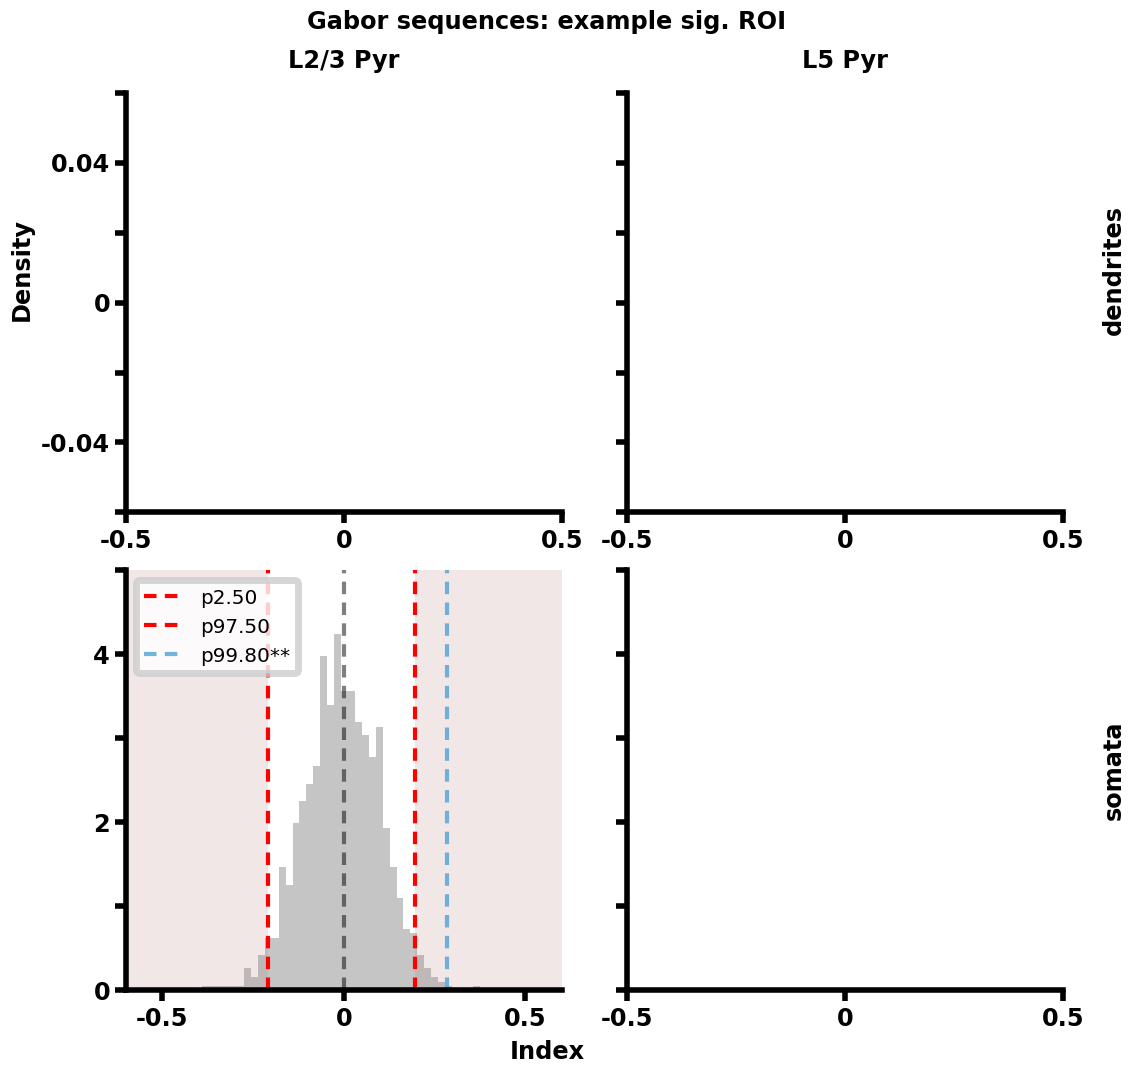

In [8]:
%run run_paper_figures.py --overwrite --paper analysis --figure 3 --panel B $parallel_arg --datadir $datadir --output $output

### Fig. 4, with full statistical power
Here, we run the analyses with the `--full_power` argument, and thus should be able to exactly reproduce the p-values reported in the paper.



________________________________________________________________________________
Fig. 4A (analysis paper). Running analysis and producing plot: Running and pupil responses to Gabor sequences.

- Minor manual formatting adjustments may be missing.
- Running and pupil images will be missing.

File will be overwritten.

Loading 11 session(s)...


100%|██████████| 11/11 [00:25<00:00,  2.31s/it]


Compiling pupil and running sequences for session 1.



Figures saved under paper_figures/analysis_paper/Fig4.
Duration: 31.95s


Fig. 4B (analysis paper). Running analysis and producing plot: Trial differences in running and pupil responses U-G vs D-G Gabor sequences.

- Minor manual formatting adjustments may be missing.

File will be overwritten.

Compiling pupil and running block differences for session 1.

Raw p-values (two-tailed):
    Running velocity:    L2/3-D: 0.96460       L2/3-S: 0.27680       L5-D: 0.80780       L5-S: 0.44040   
    Pupil diameter  :    L2/3-D: 0.89240       L2/3-S: 0.19560       L5-D: 0.96880       L5-S: 0.26840   

Figures saved under paper_figures/analysis_paper/Fig4.
Duration: 8.74s


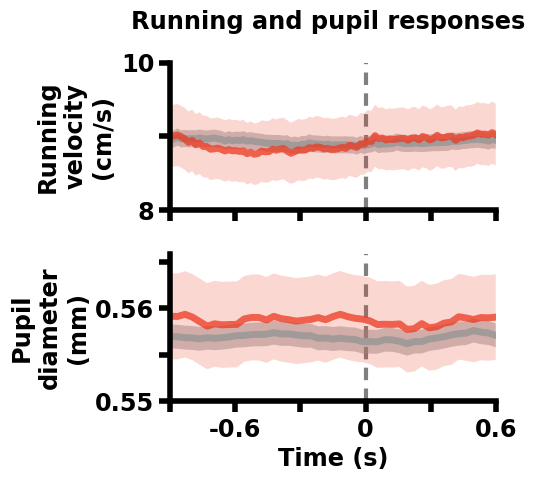

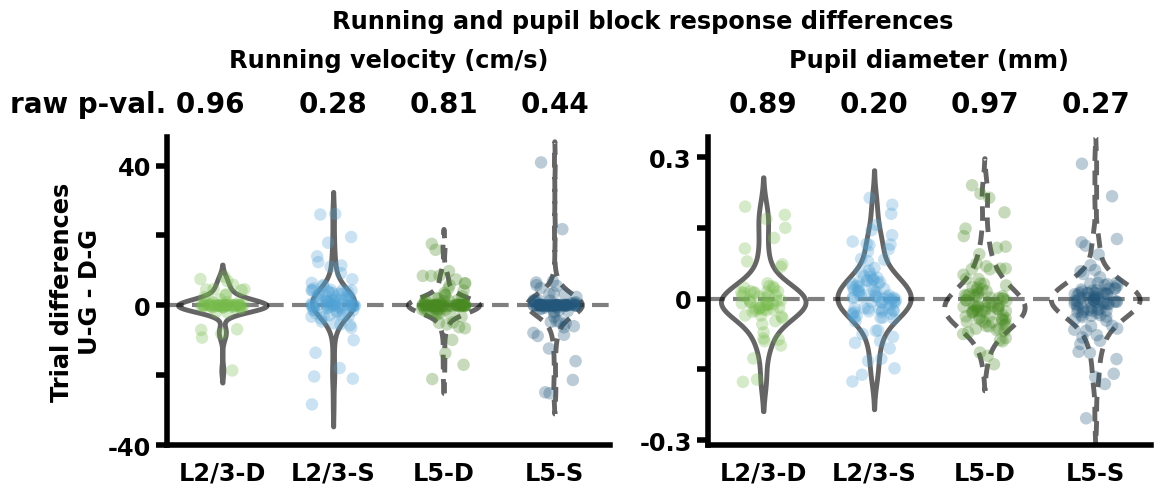

In [9]:
%run run_paper_figures.py --overwrite --paper analysis --figure 4 --panel all --full_power $parallel_arg --datadir $datadir --output $output

### Fig. 4B, with a different random seed

By default, the script uses the same random process seed as was used for the paper. Here, however, we run the analysis with a different seed, i.e. `100`. This means that the exact p-values obtained may differ slightly from those reported in the paper, although they should be qualitatively the same.

The results (analysis data and plot) are saved under a subfolder called `panels_with_diff_params`, with the seed number recorded in the file names.



________________________________________________________________________________
Fig. 4B (analysis paper). Running analysis and producing plot: Trial differences in running and pupil responses U-G vs D-G Gabor sequences.

- Minor manual formatting adjustments may be missing.
- Using a different seed from the one used in the paper: 100. Results may differ slightly from published results. To use paper seed, run script with default seed argument, i.e., '--seed paper'.

Loading 11 session(s)...


100%|██████████| 11/11 [00:19<00:00,  1.81s/it]


Compiling pupil and running block differences for session 1.



Raw p-values (two-tailed):
    Running velocity:    L2/3-D: 0.98160       L2/3-S: 0.28240       L5-D: 0.79880       L5-S: 0.44160   
    Pupil diameter  :    L2/3-D: 0.92840       L2/3-S: 0.19920       L5-D: 0.97540       L5-S: 0.28180   

Figures saved under paper_figures/analysis_paper/Fig4/panels_with_diff_params.
Duration: 27.75s


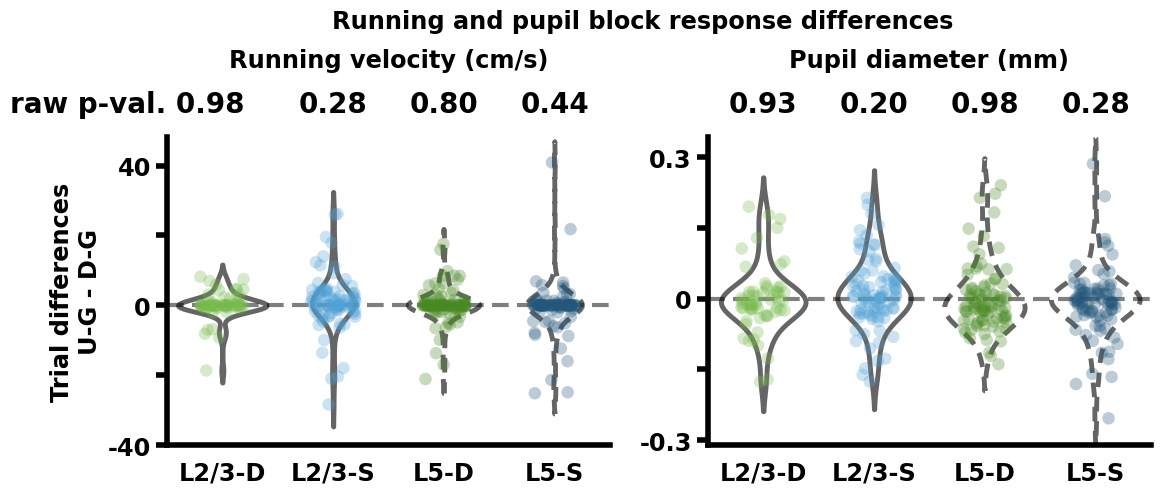

In [10]:
seed = 100
%run run_paper_figures.py --overwrite --paper analysis --figure 4 --panel B --full_power --seed $seed $parallel_arg --datadir $datadir --output $output

---
## 3. Final Notes

For most other figures and panels, the remaining sessions **(sessions 2 and 3)** must also be downloaded. This can be done by returning to **Step 1b**, and rerunning the download with the argument `--sess_ns 1-3`.

Notably, though, the analyses for some panels are:
- **computationally expensive**: generally, this applies to analyses involving lots of statistical significance comparisons, e.g. Fig. 2B of the analysis paper.  
- **long**: this is particularly the case for the decoder analyses in Fig. 5B-C of the analysis paper.

For this reason, they are best run on a **high performance compute device** (e.g., 16+ cores and 32+ GB of RAM).  